In [3]:
!pip3 install glob2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
Using legacy 'setup.py install' for glob2, since package 'wheel' is not installed.
    Running setup.py install for glob2 ... done
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
!pip3 install scikit-image

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
#https://www.thepythoncode.com/article/contour-detection-opencv-python

(850, 1280)


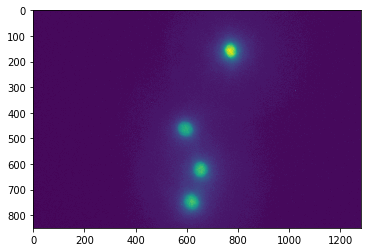

In [8]:
img_name = "images/H 7 A 40x.tif"
img = cv2.imread(img_name, 1) #cv2.IMREAD_GRAYSCALE)
img = img[:850,:]
#image = image[:850,:] # [crop y, crop x]
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img.shape)
plt.imshow(img)
plt.show()

In [3]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret1,th1 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [10]:
#find contours
contours, hierarchy = cv2.findContours(th1, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(th2, contours, -1, (0, 0, 255), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
"""for (int i = 0;i<contours.size();i++)
{
    RotatedRect minRect = minAreaRect( Mat(contours[i]) );
    Point2f rect_points[4];
    minRect.points( rect_points ); 
    for( int j = 0; j < 4; j++ )
        line( img, rect_points[j], rect_points[(j+1)%4],Scalar(255,255,0),2);
}"""

'for (int i = 0;i<contours.size();i++)\n{\n    RotatedRect minRect = minAreaRect( Mat(contours[i]) );\n    Point2f rect_points[4];\n    minRect.points( rect_points ); \n    for( int j = 0; j < 4; j++ )\n        line( img, rect_points[j], rect_points[(j+1)%4],Scalar(255,255,0),2);\n}'

In [6]:
"""for i in range(len(contours)):
    minRect = minAreaRect( Mat(contours[i]) );
    rect_points[4];
    minRect.points( rect_points ); 
    for j in range(4):
        line( img, rect_points[j], rect_points[(j+1)%4],Scalar(255,255,0),2);
"""

'for i in range(len(contours)):\n    minRect = minAreaRect( Mat(contours[i]) );\n    rect_points[4];\n    minRect.points( rect_points ); \n    for j in range(4):\n        line( img, rect_points[j], rect_points[(j+1)%4],Scalar(255,255,0),2);\n'

In [14]:
height_width = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    height_width.append(h/w)
    #cv2.putText(th2, str(w), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    #cv2.putText(th2, str(w), (x,y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255))
    #cv2.rectangle(th2, (x, y), (x + w, y + h), (255,255,255), 1)

4
4
[1, 1, 0, 1]


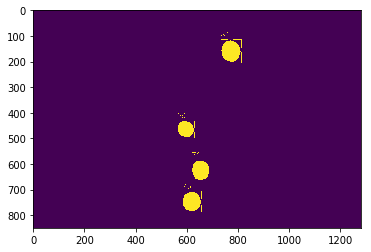

In [16]:
print(len(contours))
print(len(height_width))
print(height_width)
plt.imshow(th2)
plt.show()